# Basic Numerical Integration: the Trapezoid Rule

In [37]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Update the matplotlib configuration parameters:
# matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})
matplotlib.rcParams.update({'font.size': 18})

## Introduction

A simple illustration of the trapezoid rule for definite integration:

$$
\int_{a}^{b} f(x)\, dx 
\approx 
\frac{1}{2} \sum_{k=1}^{N} \left( x_{k} - x_{k-1} \right) \left( f(x_{k}) + f(x_{k-1}) \right).
$$
<br>

## Implementation

First, we define a simple function and sample it between 0 and 10 at 200 points

In [38]:
def f(x):
    return (x-3)*(x-5)*(x-7)+85

x = np.linspace(0, 10, 200)
y = f(x)

Choose a region to integrate over and take only a few points in that region

In [39]:
a, b = 1, 8 # the left and right boundaries
N = 4 # the number of points
xint = np.linspace(a, b, N)
yint = f(xint)

Plot both the function and the area below it in the trapezoid approximation

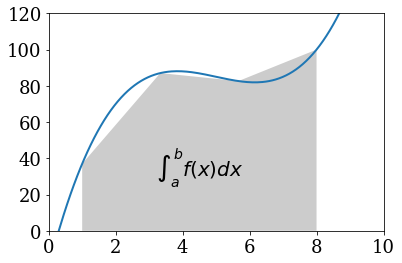

In [40]:
plt.plot(x, y, lw=2)
plt.axis([0, 10, 0, 120])
plt.fill_between(xint, 0, yint, facecolor='gray', alpha=0.4)
plt.text(0.5 * (a + b), 30,r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20);

Compute the integral both at high accuracy and with the trapezoid approximation

In [41]:
from __future__ import print_function
from scipy.integrate import quad
integral, error = quad(f, a, b)
integral_trapezoid = sum( (xint[1:] - xint[:-1]) * (yint[1:] + yint[:-1]) ) / 2
# print("The integral is:", integral, "+/-", error)
print(f'The integral calculated by scipy is: {integral} +/- {error}')
print("The trapezoid approximation with", len(xint), "points is:", integral_trapezoid)

The integral calculated by scipy is: 565.2499999999999 +/- 6.275535646693696e-12
The trapezoid approximation with 4 points is: 555.7222222222223


# Simple Animation

From `simple_animation.py`

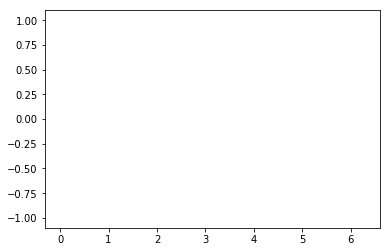

In [20]:
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)

#ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
#                              interval=25, blit=False)

plt.show()

In [12]:
def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

In [17]:
ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()

In [13]:
#ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
#                              interval=25, blit=True)

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=False)

plt.show()

In [14]:
animate

<function __main__.animate(i)>

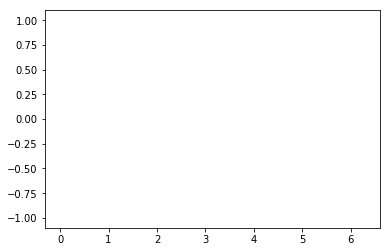

In [15]:
fig